Installing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
!pip install mglearn
import mglearn
import statsmodels.api as sm
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read File

In [2]:
filename='heart.csv'

heart_data=pd.read_csv(filename)

In [3]:
heart_data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
rows,columns=heart_data.shape 
print("Number of Rows : ",rows)
print("Number of Columns : ",columns)

Number of Rows :  4238
Number of Columns :  16


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Find & Handle Missing Values

In [6]:
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


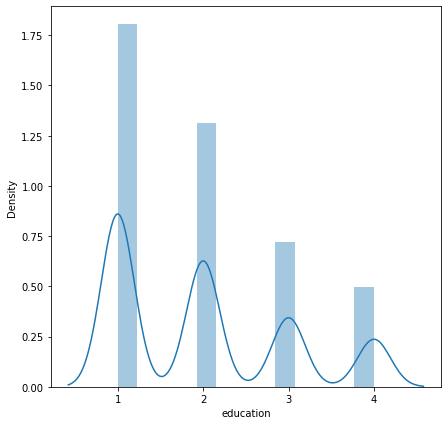

In [7]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.education)

In [8]:
heart_data['education'].fillna(heart_data['education'].mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


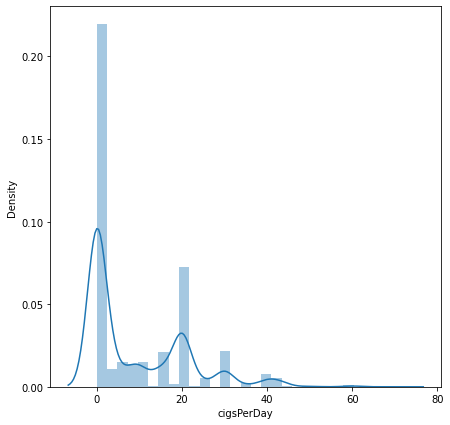

In [9]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.cigsPerDay)

In [10]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


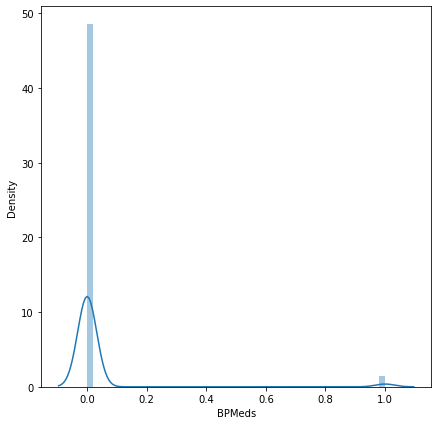

In [11]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.BPMeds)

In [12]:
heart_data['BPMeds'].fillna(heart_data['BPMeds'].mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


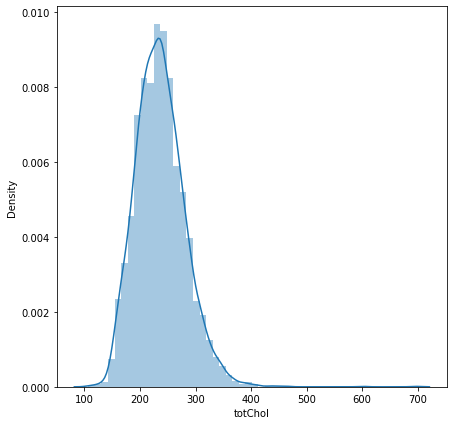

In [13]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.totChol)

In [14]:
heart_data['totChol'].fillna(heart_data['totChol'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


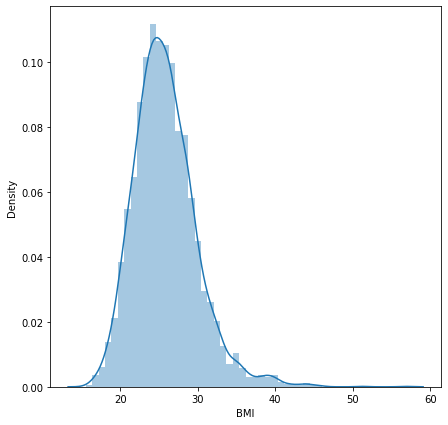

In [15]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.BMI)

In [16]:
heart_data['BMI'].fillna(heart_data['BMI'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


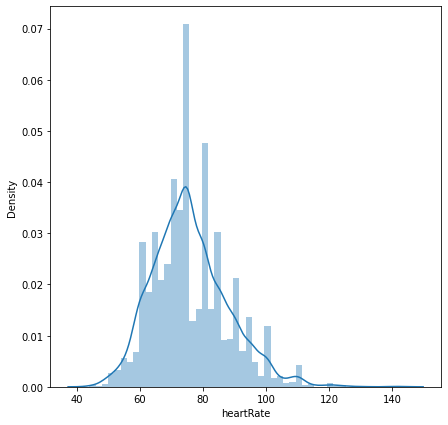

In [17]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.heartRate)

In [18]:
heart_data['heartRate'].fillna(heart_data['heartRate'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


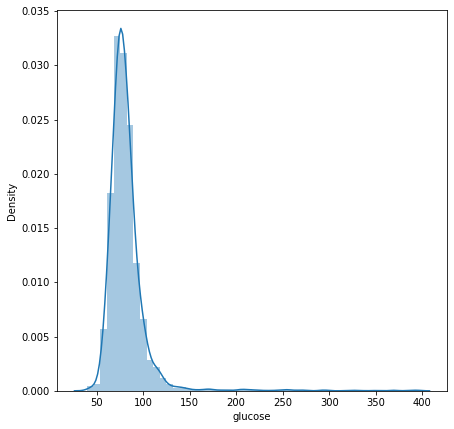

In [19]:
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(heart_data.glucose)

In [20]:
heart_data['glucose'].fillna(heart_data['glucose'].median(),inplace=True)


In [21]:
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Missing Value Handled

In [22]:
display(heart_data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [23]:
X=heart_data.drop("TenYearCHD",axis=1)
display(X)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0


In [24]:
Y=heart_data['TenYearCHD']
display(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [25]:
Counter(Y)

Counter({0: 3594, 1: 644})

Feature Selection

Chi-Square

In [26]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X_new=X.drop(['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],axis=1)
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_new,Y)
fit.scores_

array([18.91521246,  6.27160946,  0.81160326, 30.72303102, 16.09563773,
       92.16785718, 39.10371009])

In [27]:
X_new

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,4.0,0,0.0,0,0,0
1,0,2.0,0,0.0,0,0,0
2,1,1.0,1,0.0,0,0,0
3,0,3.0,1,0.0,0,1,0
4,0,3.0,1,0.0,0,0,0
...,...,...,...,...,...,...,...
4233,1,1.0,1,0.0,0,1,0
4234,1,3.0,1,0.0,0,0,0
4235,0,2.0,1,0.0,0,0,0
4236,0,1.0,1,0.0,0,0,0


ANOVA test

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [29]:
X_new=X.drop(['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'],axis=1)
X_new

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,78.0


In [30]:
X_new

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,78.0


In [31]:
test=SelectKBest(f_classif, k=5)
fit = test.fit(X_new,Y)
fit.scores_


array([226.42482952,  14.72620919,  28.41161556, 208.17180252,
        91.35845441,  23.7570853 ,   2.22208427,  63.23402253])

In [32]:
X=X.drop(['education','currentSmoker','cigsPerDay','heartRate','BMI','prevalentStroke','male','totChol'],axis=1)

In [33]:
X

,age,BPMeds,prevalentHyp,diabetes,sysBP,diaBP,glucose
0,39,0.0,0,0,106.0,70.0,77.0
1,46,0.0,0,0,121.0,81.0,76.0
2,48,0.0,0,0,127.5,80.0,70.0
3,61,0.0,1,0,150.0,95.0,103.0
4,46,0.0,0,0,130.0,84.0,85.0
...,...,...,...,...,...,...,...
4233,50,0.0,1,0,179.0,92.0,86.0
4234,51,0.0,0,0,126.5,80.0,68.0
4235,48,0.0,0,0,131.0,72.0,86.0
4236,44,0.0,0,0,126.5,87.0,78.0


Standardization

Splitting Dataset

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [45]:
scaler = StandardScaler()
temp=['age','sysBP','diaBP','glucose']
scaler.fit(X_train[temp])
X_train[temp] = scaler.transform(X_train[temp])
X_test[temp] = scaler.transform(X_test[temp]) 

Over Sampling

In [46]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy=0.9)
X_train, Y_train = sm.fit_resample(X_train,Y_train)


Under Sampling

In [47]:
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# X_train, Y_train = cc.fit_resample(X_train, Y_train)

after Balancing

In [48]:
Counter(Y_train)

Counter({0: 2875, 1: 2587})

In [49]:
Counter(Y_test)

Counter({0: 719, 1: 129})

In [50]:
X_train.shape

(5462, 7)

In [51]:
X_test.shape

(848, 7)

Classification

In [52]:
d={}

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=.01, solver='liblinear').fit(X_train,Y_train)
Y_predicted = LR_model.predict(X_test)


[[470 249]
 [ 51  78]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


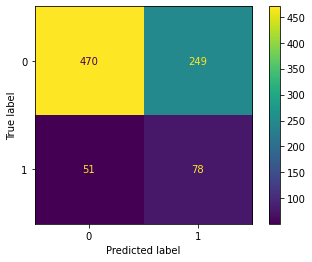

In [54]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(LR_model, X_test, Y_test)  
plt.show()

In [55]:
d["LOGISTIC REGRESSION c=.01"]=metrics.accuracy_score(Y_test, Y_predicted)
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.6462264150943396
classification_error:
0.35377358490566035
sensitivity:
0.6046511627906976
specificity:
0.6536856745479833
precision:
0.23853211009174313


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model_1 = LogisticRegression(C=1, solver='liblinear').fit(X_train,Y_train)
Y_predicted = LR_model_1.predict(X_test)

[[471 248]
 [ 50  79]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


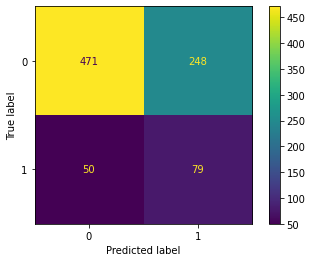

In [57]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(LR_model_1, X_test, Y_test)  
plt.show()

In [58]:
d["LOGISTIC REGRESSION c=1"]=metrics.accuracy_score(Y_test, Y_predicted)
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.6485849056603774
classification_error:
0.3514150943396226
sensitivity:
0.6124031007751938
specificity:
0.655076495132128
precision:
0.2415902140672783


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model_10 = LogisticRegression(C=10, solver='liblinear').fit(X_train,Y_train)
Y_predicted = LR_model_10.predict(X_test)

[[472 247]
 [ 50  79]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


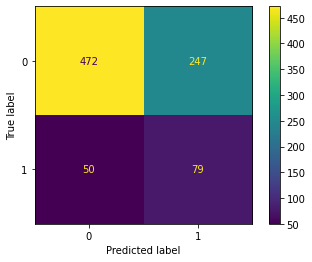

In [60]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(LR_model_10, X_test, Y_test)  
plt.show()

In [61]:
d["LOGISTIC REGRESSION c=10"]=metrics.accuracy_score(Y_test, Y_predicted)
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.6497641509433962
classification_error:
0.35023584905660377
sensitivity:
0.6124031007751938
specificity:
0.6564673157162726
precision:
0.24233128834355827


SVM

In [62]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, Y_train)
Y_predicted = SVM_model.predict(X_test)


[[449 270]
 [ 52  77]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


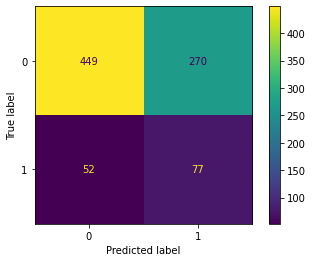

In [63]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(SVM_model, X_test, Y_test)  
plt.show()

In [64]:
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.6202830188679245
classification_error:
0.3797169811320755
sensitivity:
0.5968992248062015
specificity:
0.6244784422809457
precision:
0.2219020172910663


In [65]:
d["SVM-rbf"]=metrics.accuracy_score(Y_test, Y_predicted)

In [66]:
# from sklearn import svm
# SVM_model_l = svm.SVC(kernel='linear')
# SVM_model_l.fit(X_train, Y_train)
# Y_predicted = SVM_model_l.predict(X_test)


In [67]:
# confusion=metrics.confusion_matrix(Y_test, Y_predicted)
# print(confusion)
# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]
# plot_confusion_matrix(SVM_model_l, X_test, Y_test)  
# plt.show()

In [68]:
# d["SVM-linear"]=metrics.accuracy_score(Y_test, Y_predicted)

In [69]:
# # print(metrics.accuracy_score(Y_test, Y_predicted))
# print("accuracy:")
# print((TP + TN) / float(TP + TN + FP + FN))
# classification_error = (FP + FN) / float(TP + TN + FP + FN)

# # print(classification_error)
# print("classification_error:")
# print(1 - metrics.accuracy_score(Y_test, Y_predicted))
# print("sensitivity:")
# print(metrics.recall_score(Y_test, Y_predicted))
# print("specificity:")
# specificity = TN / (TN + FP)

# print(specificity)
# # precision = TP / float(TP + FP)
# print("precision:")
# # print(precision)
# print(metrics.precision_score(Y_test, Y_predicted))

KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model and find best k
for k in range(2,21):
  KNN_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
  Y_predicted = KNN_model.predict(X_test)
  score=metrics.accuracy_score(Y_test,Y_predicted)
  print(str(score))
  print(k)
  print("-------------------")

0.7582547169811321
2
-------------------
0.6757075471698113
3
-------------------
0.714622641509434
4
-------------------
0.6533018867924528
5
-------------------
0.6898584905660378
6
-------------------
0.6533018867924528
7
-------------------
0.6898584905660378
8
-------------------
0.6474056603773585
9
-------------------
0.6863207547169812
10
-------------------
0.6426886792452831
11
-------------------
0.6686320754716981
12
-------------------
0.6426886792452831
13
-------------------
0.6709905660377359
14
-------------------
0.6214622641509434
15
-------------------
0.652122641509434
16
-------------------
0.6273584905660378
17
-------------------
0.6474056603773585
18
-------------------
0.6179245283018868
19
-------------------
0.6474056603773585
20
-------------------


In [71]:
kvalue=4

In [72]:
KNN_model = KNeighborsClassifier(n_neighbors = kvalue).fit(X_train,Y_train)
Y_predicted = KNN_model.predict(X_test)

[[561 158]
 [ 84  45]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


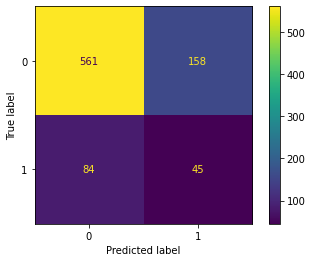

In [73]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(KNN_model, X_test, Y_test)  
plt.show()

In [74]:
d["KNN"]=metrics.accuracy_score(Y_test, Y_predicted)

In [75]:
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.714622641509434
classification_error:
0.285377358490566
sensitivity:
0.3488372093023256
specificity:
0.780250347705146
precision:
0.22167487684729065


DT

In [76]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

DT_model = DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [77]:
Y_predicted = DT_model.predict(X_test)


[[580 139]
 [ 87  42]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


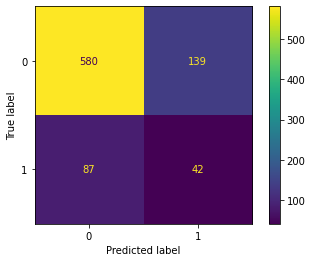

In [78]:
confusion=metrics.confusion_matrix(Y_test, Y_predicted)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
plot_confusion_matrix(DT_model, X_test, Y_test)  
plt.show()

In [79]:
d["DECISION TREE"]=metrics.accuracy_score(Y_test, Y_predicted)

In [80]:
# print(metrics.accuracy_score(Y_test, Y_predicted))
print("accuracy:")
print((TP + TN) / float(TP + TN + FP + FN))
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print(classification_error)
print("classification_error:")
print(1 - metrics.accuracy_score(Y_test, Y_predicted))
print("sensitivity:")
print(metrics.recall_score(Y_test, Y_predicted))
print("specificity:")
specificity = TN / (TN + FP)

print(specificity)
# precision = TP / float(TP + FP)
print("precision:")
# print(precision)
print(metrics.precision_score(Y_test, Y_predicted))

accuracy:
0.7334905660377359
classification_error:
0.2665094339622641
sensitivity:
0.32558139534883723
specificity:
0.8066759388038943
precision:
0.23204419889502761


comparison

In [81]:
for i in d:
  print('{} => {}'.format(i,round(d[i],3)))

LOGISTIC REGRESSION c=.01 => 0.646
LOGISTIC REGRESSION c=1 => 0.649
LOGISTIC REGRESSION c=10 => 0.65
SVM-rbf => 0.62
KNN => 0.715
DECISION TREE => 0.733


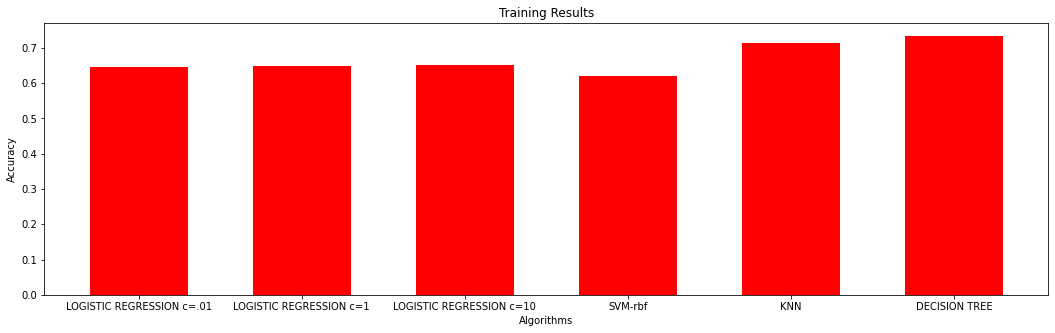

In [82]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(list(d.keys()), d.values(), width=0.6, color='r')
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.title("Training Results")
plt.show()

Evaluation

In [83]:
acc={}
sen={}
pre={}

In [84]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(LR_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["LR"]=["LR"]
acc["LR"].append(round(scores['test_score'].mean(),2))

0.6444532615464974


In [85]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(LR_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["LR"]=["LR"]
sen["LR"].append(round(scores['test_score'].mean(),2))

0.5995211158001854


In [86]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(LR_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["LR"]=["LR"]
pre["LR"].append(round(scores['test_score'].mean(),2))

0.6317656584816518


In [87]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(LR_model_1,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["LR_1"]=["LR_1"]
acc["LR_1"].append(round(scores['test_score'].mean(),2))

0.6450037165759287


In [88]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(LR_model_1,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["LR_1"]=["LR_1"]
sen["LR_1"].append(round(scores['test_score'].mean(),2))

0.5944913351890095


In [89]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(LR_model_1,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["LR_1"]=["LR_1"]
pre["LR_1"].append(round(scores['test_score'].mean(),2))

0.6340364957135977


In [90]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(LR_model_10,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["LR_10"]=["LR_10"]
acc["LR_10"].append(round(scores['test_score'].mean(),2))

0.6448202315661182


In [91]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(LR_model_10,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["LR_10"]=["LR_10"]
sen["LR_10"].append(round(scores['test_score'].mean(),2))

0.5941037382897848


In [92]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(LR_model_10,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["LR_10"]=["LR_10"]
pre["LR_10"].append(round(scores['test_score'].mean(),2))

0.633837137007738


In [93]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(SVM_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["SVM"]=["SVM"]
acc["SVM"].append(round(scores['test_score'].mean(),2))

0.6636763297640812


In [94]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(SVM_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["SVM"]=["SVM"]
sen["SVM"].append(round(scores['test_score'].mean(),2))

0.6513304001676095


In [95]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(SVM_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["SVM"]=["SVM"]
pre["SVM"].append(round(scores['test_score'].mean(),2))

0.6433653996833298


In [96]:
# from sklearn.model_selection import cross_validate
# scoring = metrics.make_scorer(metrics.accuracy_score)
# scores = cross_validate(SVM_model_l,X_train,Y_train, cv=10,
#                         scoring=scoring)
# print(scores['test_score'].mean())
# sen["SVM-linear"]=["SVM-linear"]
# sen["SVM-linear"].append(round(scores['test_score'].mean(),2))

In [97]:
# from sklearn.model_selection import cross_validate
# scoring = metrics.make_scorer(metrics.recall_score)
# scores = cross_validate(SVM_model_l,X_train,Y_train, cv=10,
#                         scoring=scoring)
# print(scores['test_score'].mean())
# sen["SVM-linear"]=["SVM-linear"]
# sen["SVM-linear"].append(round(scores['test_score'].mean(),2))

In [98]:
# from sklearn.model_selection import cross_validate
# scoring = metrics.make_scorer(metrics.precision_score)
# scores = cross_validate(SVM_model_l,X_train,Y_train, cv=10,
#                         scoring=scoring)
# print(scores['test_score'].mean())
# pre["SVM-linear"]=["SVM-linear"]
# pre["SVM-linear"].append(round(scores['test_score'].mean(),2))

In [99]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(KNN_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["KNN"]=["KNN"]
acc["KNN"].append(round(scores['test_score'].mean(),2))

0.813804233548292


In [100]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(KNN_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["KNN"]=["KNN"]
sen["KNN"].append(round(scores['test_score'].mean(),2))

0.8739711472269611


In [101]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(KNN_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["KNN"]=["KNN"]
pre["KNN"].append(round(scores['test_score'].mean(),2))

0.7663977569513066


In [102]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.accuracy_score)
scores = cross_validate(DT_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
acc["DT"]=["DT"]
acc["DT"].append(round(scores['test_score'].mean(),2))

0.7999320301879715


In [103]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.recall_score)
scores = cross_validate(DT_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
sen["DT"]=["DT"]
sen["DT"].append(round(scores['test_score'].mean(),2))

0.8048741432462363


In [104]:
from sklearn.model_selection import cross_validate
scoring = metrics.make_scorer(metrics.precision_score)
scores = cross_validate(DT_model,X_train,Y_train, cv=10,
                        scoring=scoring)
print(scores['test_score'].mean())
pre["DT"]=["DT"]
pre["DT"].append(round(scores['test_score'].mean(),2))

0.7748897973145675


In [105]:
print("NAME     acc    sen     pre")
for i in acc:
  print(acc[i][0],end="    ")
  print(acc[i][1],end="    ")
  print(sen[i][1],end="    ")
  print(pre[i][1])


NAME     acc    sen     pre
LR    0.64    0.6    0.63
LR_1    0.65    0.59    0.63
LR_10    0.64    0.59    0.63
SVM    0.66    0.65    0.64
KNN    0.81    0.87    0.77
DT    0.8    0.8    0.77


Prediction

In [106]:
# input_data=(52,0,0,0,155,93,70) # 0
input_data=(40,0,0,210,103,71,68) #1

input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=KNN_model.predict(input_data_reshaped)
print(input_data_reshaped)
print(prediction)

if prediction==1:
  print("Risk of Heart Disease")
else:
  print("Healthy")

[[ 40   0   0 210 103  71  68]]
[1]
Risk of Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [107]:
input_data=(52,0,0,0,155,93,70) # 0


input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
prediction=KNN_model.predict(input_data_reshaped)
print(input_data_reshaped)
print(prediction)

if prediction==1:
  print("Risk of Heart Disease")
else:
  print("Healthy")

[[ 52   0   0   0 155  93  70]]
[1]
Risk of Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
